In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

Mean green width: 1.42771
Mean pink width: 1.56944
Mean blue width: 1.93528
Mean white width: 4.79182
Mean black width: 6.43417


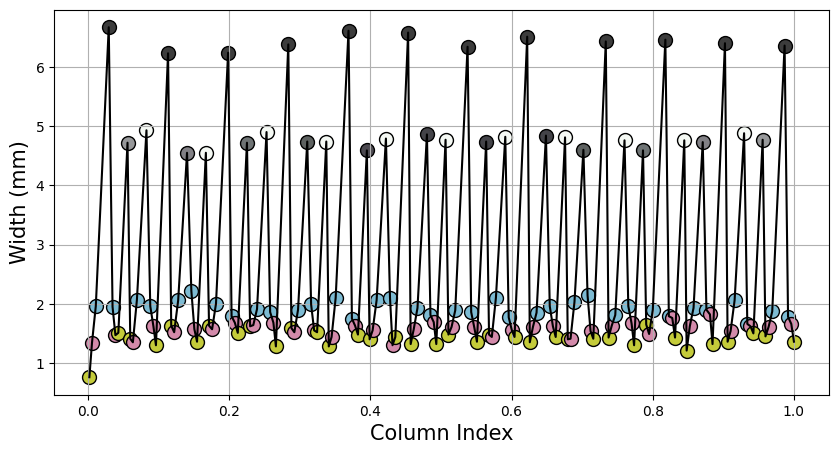

In [2]:
# Load Data
file_path = "op_art_analysis.xlsx"
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name="Cantus Firmus")

# Plot line graph
plt.figure(figsize=(10, 5))
plt.plot(df['x'], df['Width'], linestyle='-', color='black')  # Line in black

if 'Colour' not in df.columns or 'Width' not in df.columns:
    raise ValueError("Ensure the Excel file has 'colour' and 'Width' columns.")

colour_hex = {'green': '#c4cb3aff', 'pink': '#d38aaaff', 'blue': '#7dbbd3ff', 
              'white': '#f5f9f4ff', 'black': '#3c3c3cff', 'grey0': '#acabaeff',
              'grey1': '#97989aff', 'grey2': '#818085ff', 'grey3': '#6e7374ff',
              'grey4': '#5d6160ff', 'grey5': '#4c4950ff', 'grey6': '#434348ff'}
widths = {'green':[], 'pink':[], 'blue':[], 'white':[], 'black':[]}
grey_xs = []

# Apply colors to data points
for (x, width, colour) in zip(df['x'], df['Width'], df['Colour']):
    hex_val = colour_hex[colour]
    if colour in widths: widths[colour].append(width)
    if colour[:4] == 'grey': grey_xs.append(x)
    plt.scatter(x, width, color=hex_val, edgecolors='black', s=100)  # s controls size

widths['green'] = widths['green'][1:]
for colour in ['green', 'pink', 'blue', 'white', 'black']:
    print(f"Mean {colour} width: {np.round(np.mean(widths[colour]), 5)}")


# Labels and grid
plt.tick_params(axis='both')
plt.xlabel("Column Index", fontsize=15)
plt.ylabel("Width (mm)", fontsize=15)
plt.grid(True)

# Show the plot
plt.show()

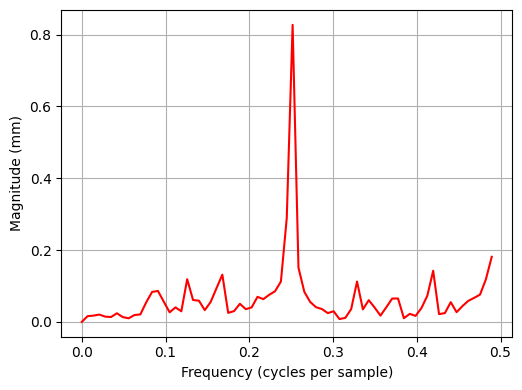

In [3]:
# Extract signal (Width values)
widths = df['Width']
y = widths - np.mean(widths)
N = len(y)  # Number of data points
T = 1  # Time step

# Apply Fourier Transform
fft_values = np.fft.fft(y)
frequencies = np.fft.fftfreq(N, T)  # Frequency in cycles per sample

# Normalize FFT so magnitude is in mm (same as original units)
magnitude = np.abs(fft_values) / N  # Dividing by N gives amplitude in original units (mm)

# Plot Fourier Transform (Magnitude Spectrum)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 2)
plt.plot(frequencies[:N//2], magnitude[:N//2], color='red')  # Only positive frequencies
plt.xlabel("Frequency (cycles per sample)")
plt.ylabel("Magnitude (mm)")
# plt.title("Fourier Transform (Frequency Domain)")
plt.grid(True)

plt.tight_layout()
plt.show()


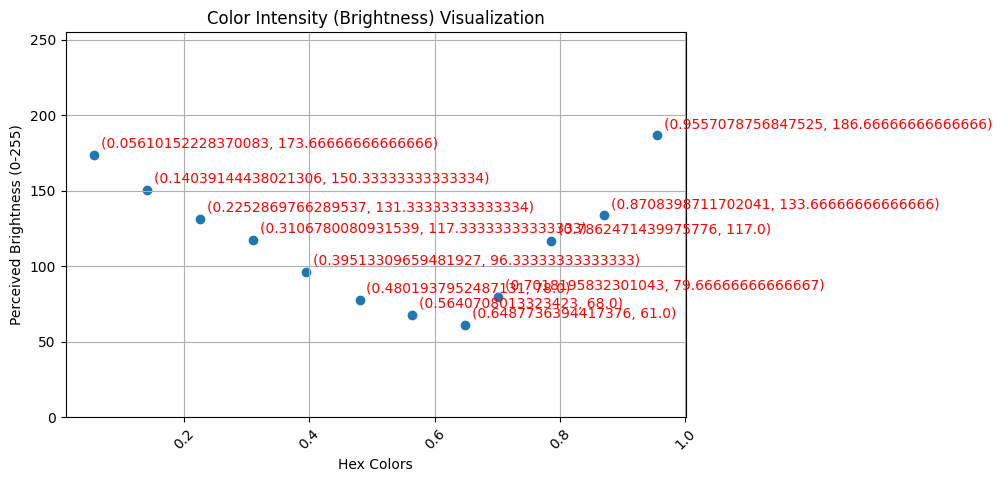

In [11]:
grey_shades = ['#a9acb4', '#939997', '#7f7f8c', '#73737a', '#5c6164', '#4f4c4f', '#444444', '#3e3c3d', '#4c4f54', '#717876', '#858686', '#bababc']

def hex_to_rgb(hex_color):
    """Convert hex color (#RRGGBB) to an (R, G, B) tuple."""
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

def simple_average(hex_color):
    """Calculate intensity using simple averaging of RGB values."""
    r, g, b = hex_to_rgb(hex_color)
    return (r + g + b) / 3

grey_intensities = [simple_average(colour) for colour in grey_shades]

# Write to CSV
import csv

# Example data
x_values = [0.1, 0.2, 0.3]
y_values = [1.0, 1.1, 1.2]

# Write to CSV
with open('cantus-firmus-analysis.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['x', 'intensity'])  # Column headers
    writer.writerows(zip(grey_xs, grey_intensities))  # Write rows

# Plot
plt.figure(figsize=(8, 5))
scatter = plt.scatter(grey_xs, grey_intensities)

# Annotate each point with more control
for i in range(len(grey_xs)):
    plt.annotate(f"({grey_xs[i]}, {grey_intensities[i]})", (grey_xs[i], grey_intensities[i]), textcoords="offset points", xytext=(5,5), ha='left', fontsize=10, color="red")

# Labels and Title
plt.xlabel("Hex Colors")
plt.ylabel("Perceived Brightness (0-255)")
plt.title("Color Intensity (Brightness) Visualization")
plt.ylim(0, 255)  # Brightness scale (0 to 255)
plt.xticks(rotation=45)
plt.grid(True)
